Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story.So in this Dataset we will be predicting our target variable i.e flight price(INR) based on the other attributes, so here we will be using linear Regression model.

In [48]:
#importing all the libraries and loading the csv file

In [49]:
import warnings
warnings.filterwarnings('ignore')

In [50]:
import pandas as pd
import numpy as np

In [51]:
df=pd.read_csv('flight.csv',parse_dates=[1],names=range(0,11),header=0)

In [52]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


EXPLORATORY DATA ANALYSIS

In [53]:
#checking the data types of the column

In [54]:
df.dtypes

0             object
1     datetime64[ns]
2             object
3             object
4             object
5             object
6             object
7             object
8             object
9             object
10             int64
dtype: object

In [55]:
df.shape

(1199, 11)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   0       1199 non-null   object        
 1   1       1199 non-null   datetime64[ns]
 2   2       1199 non-null   object        
 3   3       1199 non-null   object        
 4   4       1199 non-null   object        
 5   5       1199 non-null   object        
 6   6       1199 non-null   object        
 7   7       1199 non-null   object        
 8   8       1199 non-null   object        
 9   9       1199 non-null   object        
 10  10      1199 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 103.2+ KB


In [57]:
#from the above we can infer that no null values are present in the dataset

FEATURE ENGINEERING

In [58]:
#here we will be seperating the day, month, year and price to check how price is dependent on date.
df_dep_date=pd.DataFrame()
df_dep_date["month"]=df[1].dt.month_name()
df_dep_date["year"]=df[1].dt.year
df_dep_date["day"]=df[1].dt.day_name()
df_dep_date["price"]=df[10]
df_dep_date

,month,year,day,price
0,March,2019,Sunday,3897
1,January,2019,Saturday,7662
2,September,2019,Friday,13882
3,December,2019,Thursday,6218
4,January,2019,Thursday,13302
...,...,...,...,...
1194,March,2019,Thursday,5092
1195,June,2019,Thursday,10844
1196,September,2019,Tuesday,23583
1197,December,2019,Thursday,10676


In [59]:
#importing Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'month wise price disribution')

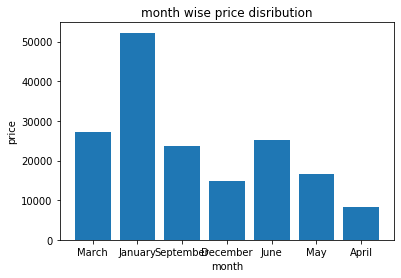

In [60]:
plt.bar(df_dep_date["month"],df_dep_date["price"])
plt.xlabel('month')
plt.ylabel('price')
plt.title('month wise price disribution')

In [61]:
# from the above we can see that price is high in the mnth of jan

Text(0.5, 1.0, 'day-price bar graph')

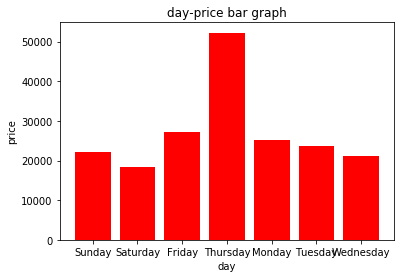

In [62]:
plt.bar(df_dep_date["day"],df_dep_date["price"],color='red')
plt.xlabel('day')
plt.ylabel('price')
plt.title('day-price bar graph')

In [63]:
#seperating hr and mins from duration column
df['Hour'] = df[7] .str.split('h').str[0]
df['dur_Minute'] = df[7] .str.split('h').str[1]

In [64]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,Hour,dur_Minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2,50m
1,Air India,2019-01-05,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,7,25m
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,19,
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,25m
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,4,45m


In [65]:
df['minute']=df['dur_Minute'].str.split('m').str[0]

In [66]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,Hour,dur_Minute,minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2,50m,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,7,25m,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,19,,
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,25m,25
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,4,45m,45


In [67]:
df.drop('dur_Minute',axis=1,inplace=True)

In [68]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,Hour,minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,19,
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,25
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,4,45


In [69]:
df['minute']=df['minute'].replace('',np.NaN)

In [70]:
df.drop(7,axis=1,inplace=True)  #as we have divided the duration column in hour and min taken in a route therefore we have
                                #dropped duration column i.e 7

In [71]:
df.head()

,0,1,2,3,4,5,6,8,9,10,Hour,minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,non-stop,No info,3897,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,2 stops,No info,7662,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,2 stops,No info,13882,19,NaN
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,1 stop,No info,6218,5,25
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,1 stop,No info,13302,4,45


In [72]:
df['route1']=df[4].str.split('?').str[0]

In [73]:
df['route2']=df[4].str.split('?').str[1]

In [74]:
df['route3']=df[4].str.split('?').str[2]
df['route4']=df[4].str.split('?').str[3]
df['route5']=df[4].str.split('?').str[4]

In [75]:
df.head()

,0,1,2,3,4,5,6,8,9,10,Hour,minute,route1,route2,route3,route4,route5
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,non-stop,No info,3897,2,50,BLR,DEL,NaN,NaN,NaN
1,Air India,2019-01-05,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,2 stops,No info,7662,7,25,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,2 stops,No info,13882,19,NaN,DEL,LKO,BOM,COK,NaN
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,1 stop,No info,6218,5,25,CCU,NAG,BLR,NaN,NaN
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,1 stop,No info,13302,4,45,BLR,NAG,DEL,NaN,NaN


In [76]:
df['route1'].fillna("None",inplace=True)
df['route2'].fillna("None",inplace=True)
df['route3'].fillna("None",inplace=True)
df['route4'].fillna("None",inplace=True)
df['route5'].fillna("None",inplace=True)

In [77]:
df.head()

,0,1,2,3,4,5,6,8,9,10,Hour,minute,route1,route2,route3,route4,route5
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,non-stop,No info,3897,2,50,BLR,DEL,None,None,None
1,Air India,2019-01-05,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,2 stops,No info,7662,7,25,CCU,IXR,BBI,BLR,None
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,2 stops,No info,13882,19,NaN,DEL,LKO,BOM,COK,None
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,1 stop,No info,6218,5,25,CCU,NAG,BLR,None,None
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,1 stop,No info,13302,4,45,BLR,NAG,DEL,None,None


In [78]:
df.drop(4,axis=1,inplace=True)

In [79]:
df.head()

,0,1,2,3,5,6,8,9,10,Hour,minute,route1,route2,route3,route4,route5
0,IndiGo,2019-03-24,Banglore,New Delhi,22:20,01:10 22 Mar,non-stop,No info,3897,2,50,BLR,DEL,None,None,None
1,Air India,2019-01-05,Kolkata,Banglore,05:50,13:15,2 stops,No info,7662,7,25,CCU,IXR,BBI,BLR,None
2,Jet Airways,2019-09-06,Delhi,Cochin,09:25,04:25 10 Jun,2 stops,No info,13882,19,NaN,DEL,LKO,BOM,COK,None
3,IndiGo,2019-12-05,Kolkata,Banglore,18:05,23:30,1 stop,No info,6218,5,25,CCU,NAG,BLR,None,None
4,IndiGo,2019-01-03,Banglore,New Delhi,16:50,21:35,1 stop,No info,13302,4,45,BLR,NAG,DEL,None,None


In [80]:
#as we have duration hrs we can drop the arrival and departure time

In [81]:
df.drop(5,axis=1,inplace=True)
df.drop(6,axis=1,inplace=True)

In [82]:
df.head()

,0,1,2,3,8,9,10,Hour,minute,route1,route2,route3,route4,route5
0,IndiGo,2019-03-24,Banglore,New Delhi,non-stop,No info,3897,2,50,BLR,DEL,None,None,None
1,Air India,2019-01-05,Kolkata,Banglore,2 stops,No info,7662,7,25,CCU,IXR,BBI,BLR,None
2,Jet Airways,2019-09-06,Delhi,Cochin,2 stops,No info,13882,19,NaN,DEL,LKO,BOM,COK,None
3,IndiGo,2019-12-05,Kolkata,Banglore,1 stop,No info,6218,5,25,CCU,NAG,BLR,None,None
4,IndiGo,2019-01-03,Banglore,New Delhi,1 stop,No info,13302,4,45,BLR,NAG,DEL,None,None


In [83]:
df.dtypes

0                 object
1         datetime64[ns]
2                 object
3                 object
8                 object
9                 object
10                 int64
Hour              object
minute            object
route1            object
route2            object
route3            object
route4            object
route5            object
dtype: object

In [84]:
df['Hour']=df['Hour'].astype(int)

In [85]:
df['minute']=df['minute'].replace(np.NaN,df['minute'].median())  #replacing nan value present in minute col

In [86]:
df['minute']=df['minute'].astype(int)

In [87]:
df.dtypes

0                 object
1         datetime64[ns]
2                 object
3                 object
8                 object
9                 object
10                 int64
Hour               int32
minute             int32
route1            object
route2            object
route3            object
route4            object
route5            object
dtype: object

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   0       1199 non-null   object        
 1   1       1199 non-null   datetime64[ns]
 2   2       1199 non-null   object        
 3   3       1199 non-null   object        
 4   8       1199 non-null   object        
 5   9       1199 non-null   object        
 6   10      1199 non-null   int64         
 7   Hour    1199 non-null   int32         
 8   minute  1199 non-null   int32         
 9   route1  1199 non-null   object        
 10  route2  1199 non-null   object        
 11  route3  1199 non-null   object        
 12  route4  1199 non-null   object        
 13  route5  1199 non-null   object        
dtypes: datetime64[ns](1), int32(2), int64(1), object(10)
memory usage: 121.9+ KB


In [89]:
#converting cat values into num values using label encoder

In [90]:
from sklearn.preprocessing import LabelEncoder

In [91]:
le=LabelEncoder()

In [92]:
a=[0,2,3,8,9,'route1','route2','route3','route4','route5']
for i in a:
    df[i]=le.fit_transform(df[i])

In [93]:
df.dtypes

0                  int32
1         datetime64[ns]
2                  int32
3                  int32
8                  int32
9                  int32
10                 int64
Hour               int32
minute             int32
route1             int32
route2             int32
route3             int32
route4             int32
route5             int32
dtype: object

In [94]:
df.describe()

,0,2,3,8,9,10,Hour,minute,route1,route2,route3,route4,route5
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000
mean,4.017515,1.878232,1.499583,1.140951,4.372811,9029.247706,9.977481,31.117598,2.050042,11.241034,8.482902,5.415346,1.997498
std,2.302396,1.165812,1.502849,1.358575,1.203901,4628.647407,8.392321,14.403916,1.242338,6.361622,5.533281,1.489854,0.064555
min,0.000000,0.000000,0.000000,0.000000,0.000000,1965.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,1.000000,0.000000,5.000000,5199.500000,2.000000,20.000000,1.000000,7.000000,4.000000,6.000000,2.000000
50%,4.000000,2.000000,1.000000,0.000000,5.000000,8153.000000,8.000000,30.000000,2.000000,8.000000,5.000000,6.000000,2.000000
75%,6.000000,3.000000,2.000000,3.000000,5.000000,12373.000000,15.000000,45.000000,3.000000,14.000000,16.000000,6.000000,2.000000
max,10.000000,4.000000,5.000000,3.000000,5.000000,52229.000000,47.000000,55.000000,4.000000,32.000000,16.000000,6.000000,2.000000


From the above can conclude that outilers is present in our dataset by looking at 3rd quartile value and maximum value.For example we can see in 10th column that 75% i.e 3rd quartile is 12373 and max value is 52229, so we can say that outliers is present in the above data.

In [52]:
#splitting the data in x and y(target)

In [48]:
x1=df.drop(1,axis=1)
x=x1.drop(10,axis=1)

In [49]:
x.columns

Index([       0,        2,        3,        8,        9,   'Hour', 'minute',
       'route1', 'route2', 'route3', 'route4', 'route5'],
      dtype='object')

In [50]:
x.head()

,0,2,3,8,9,Hour,minute,route1,route2,route3,route4,route5
0,3,0,5,3,5,2,50,0,13,16,6,2
1,1,3,0,1,5,7,25,2,21,1,0,2
2,4,2,1,1,5,19,30,3,25,4,2,2
3,3,3,0,0,5,5,25,2,27,3,6,2
4,3,0,5,0,5,4,45,0,27,7,6,2


In [51]:
x.shape

(1199, 12)

In [53]:
y=df[10].values
y=y.reshape(-1,1)

In [55]:
y.shape

(1199, 1)

In [56]:
#data visualisation

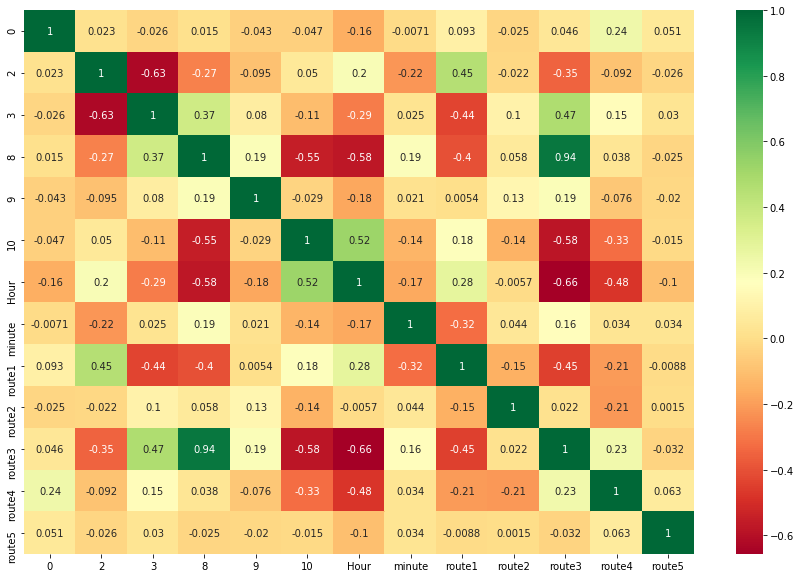

In [68]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')   #visualising the correlation between the attributes

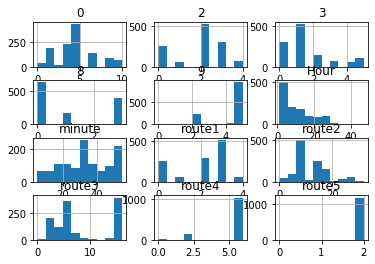

In [58]:
x.hist()
plt.show()  #plotting the histogram

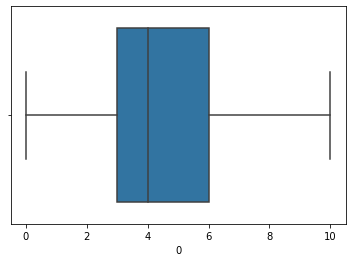

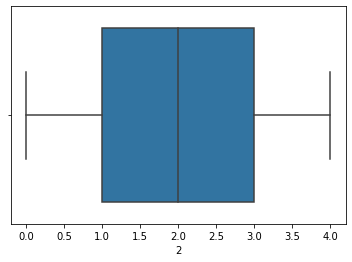

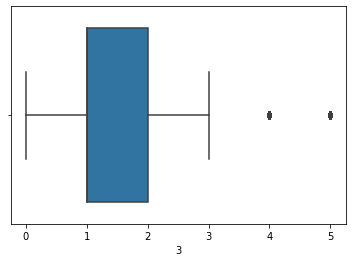

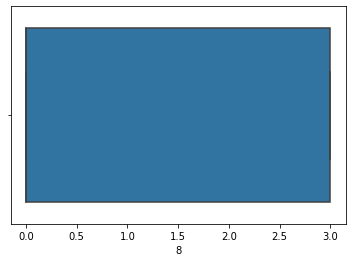

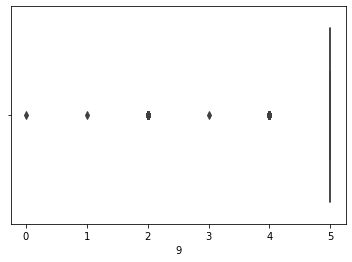

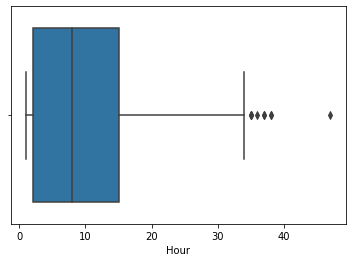

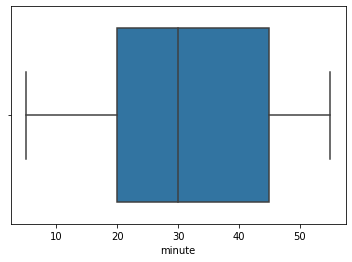

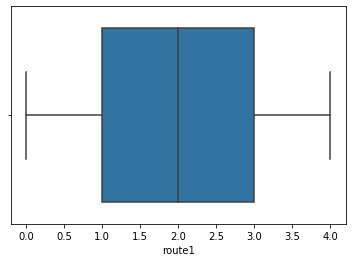

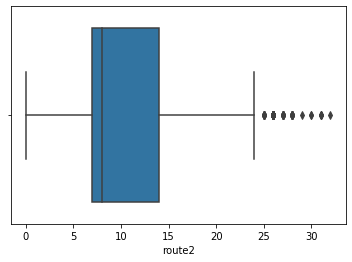

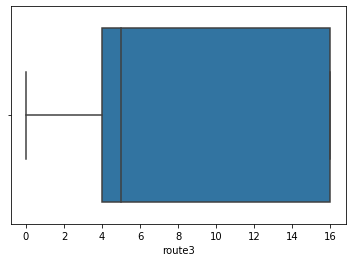

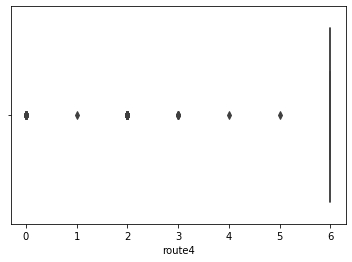

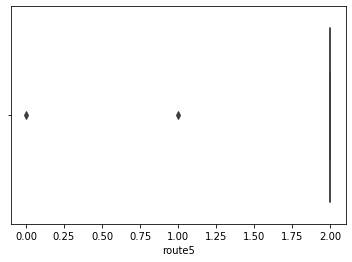

In [72]:
for i in x.columns:
    plt.figure()
    sns.boxplot(x1[i])

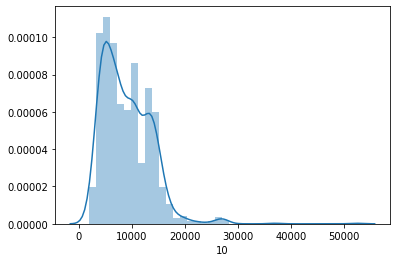

In [59]:
sns.distplot(df[10])   #distribution polt of price

Text(0, 0.5, 'no of stops')

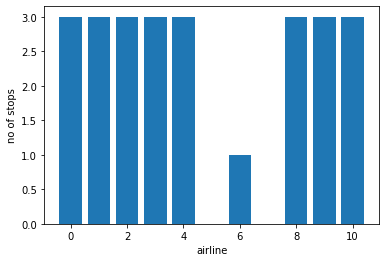

In [60]:
plt.bar(df[0],df[8])
plt.xlabel('airline')
plt.ylabel('no of stops')

Text(0, 0.5, 'price')

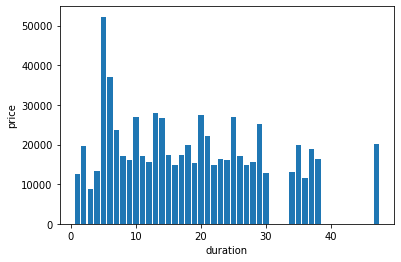

In [62]:
plt.bar(df['Hour'],df[10])
plt.xlabel('duration')
plt.ylabel('price')

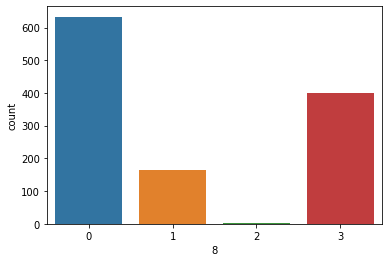

In [63]:
sns.countplot(df[8]) #count of no of stops

Text(0.5, 0, 'no of stops')

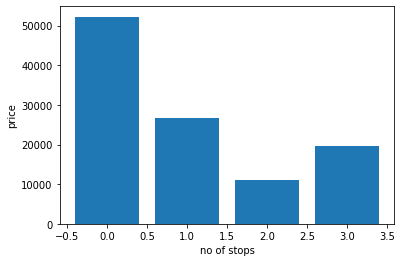

In [66]:
plt.bar(df[8],df[10])
plt.ylabel('price')
plt.xlabel('no of stops')

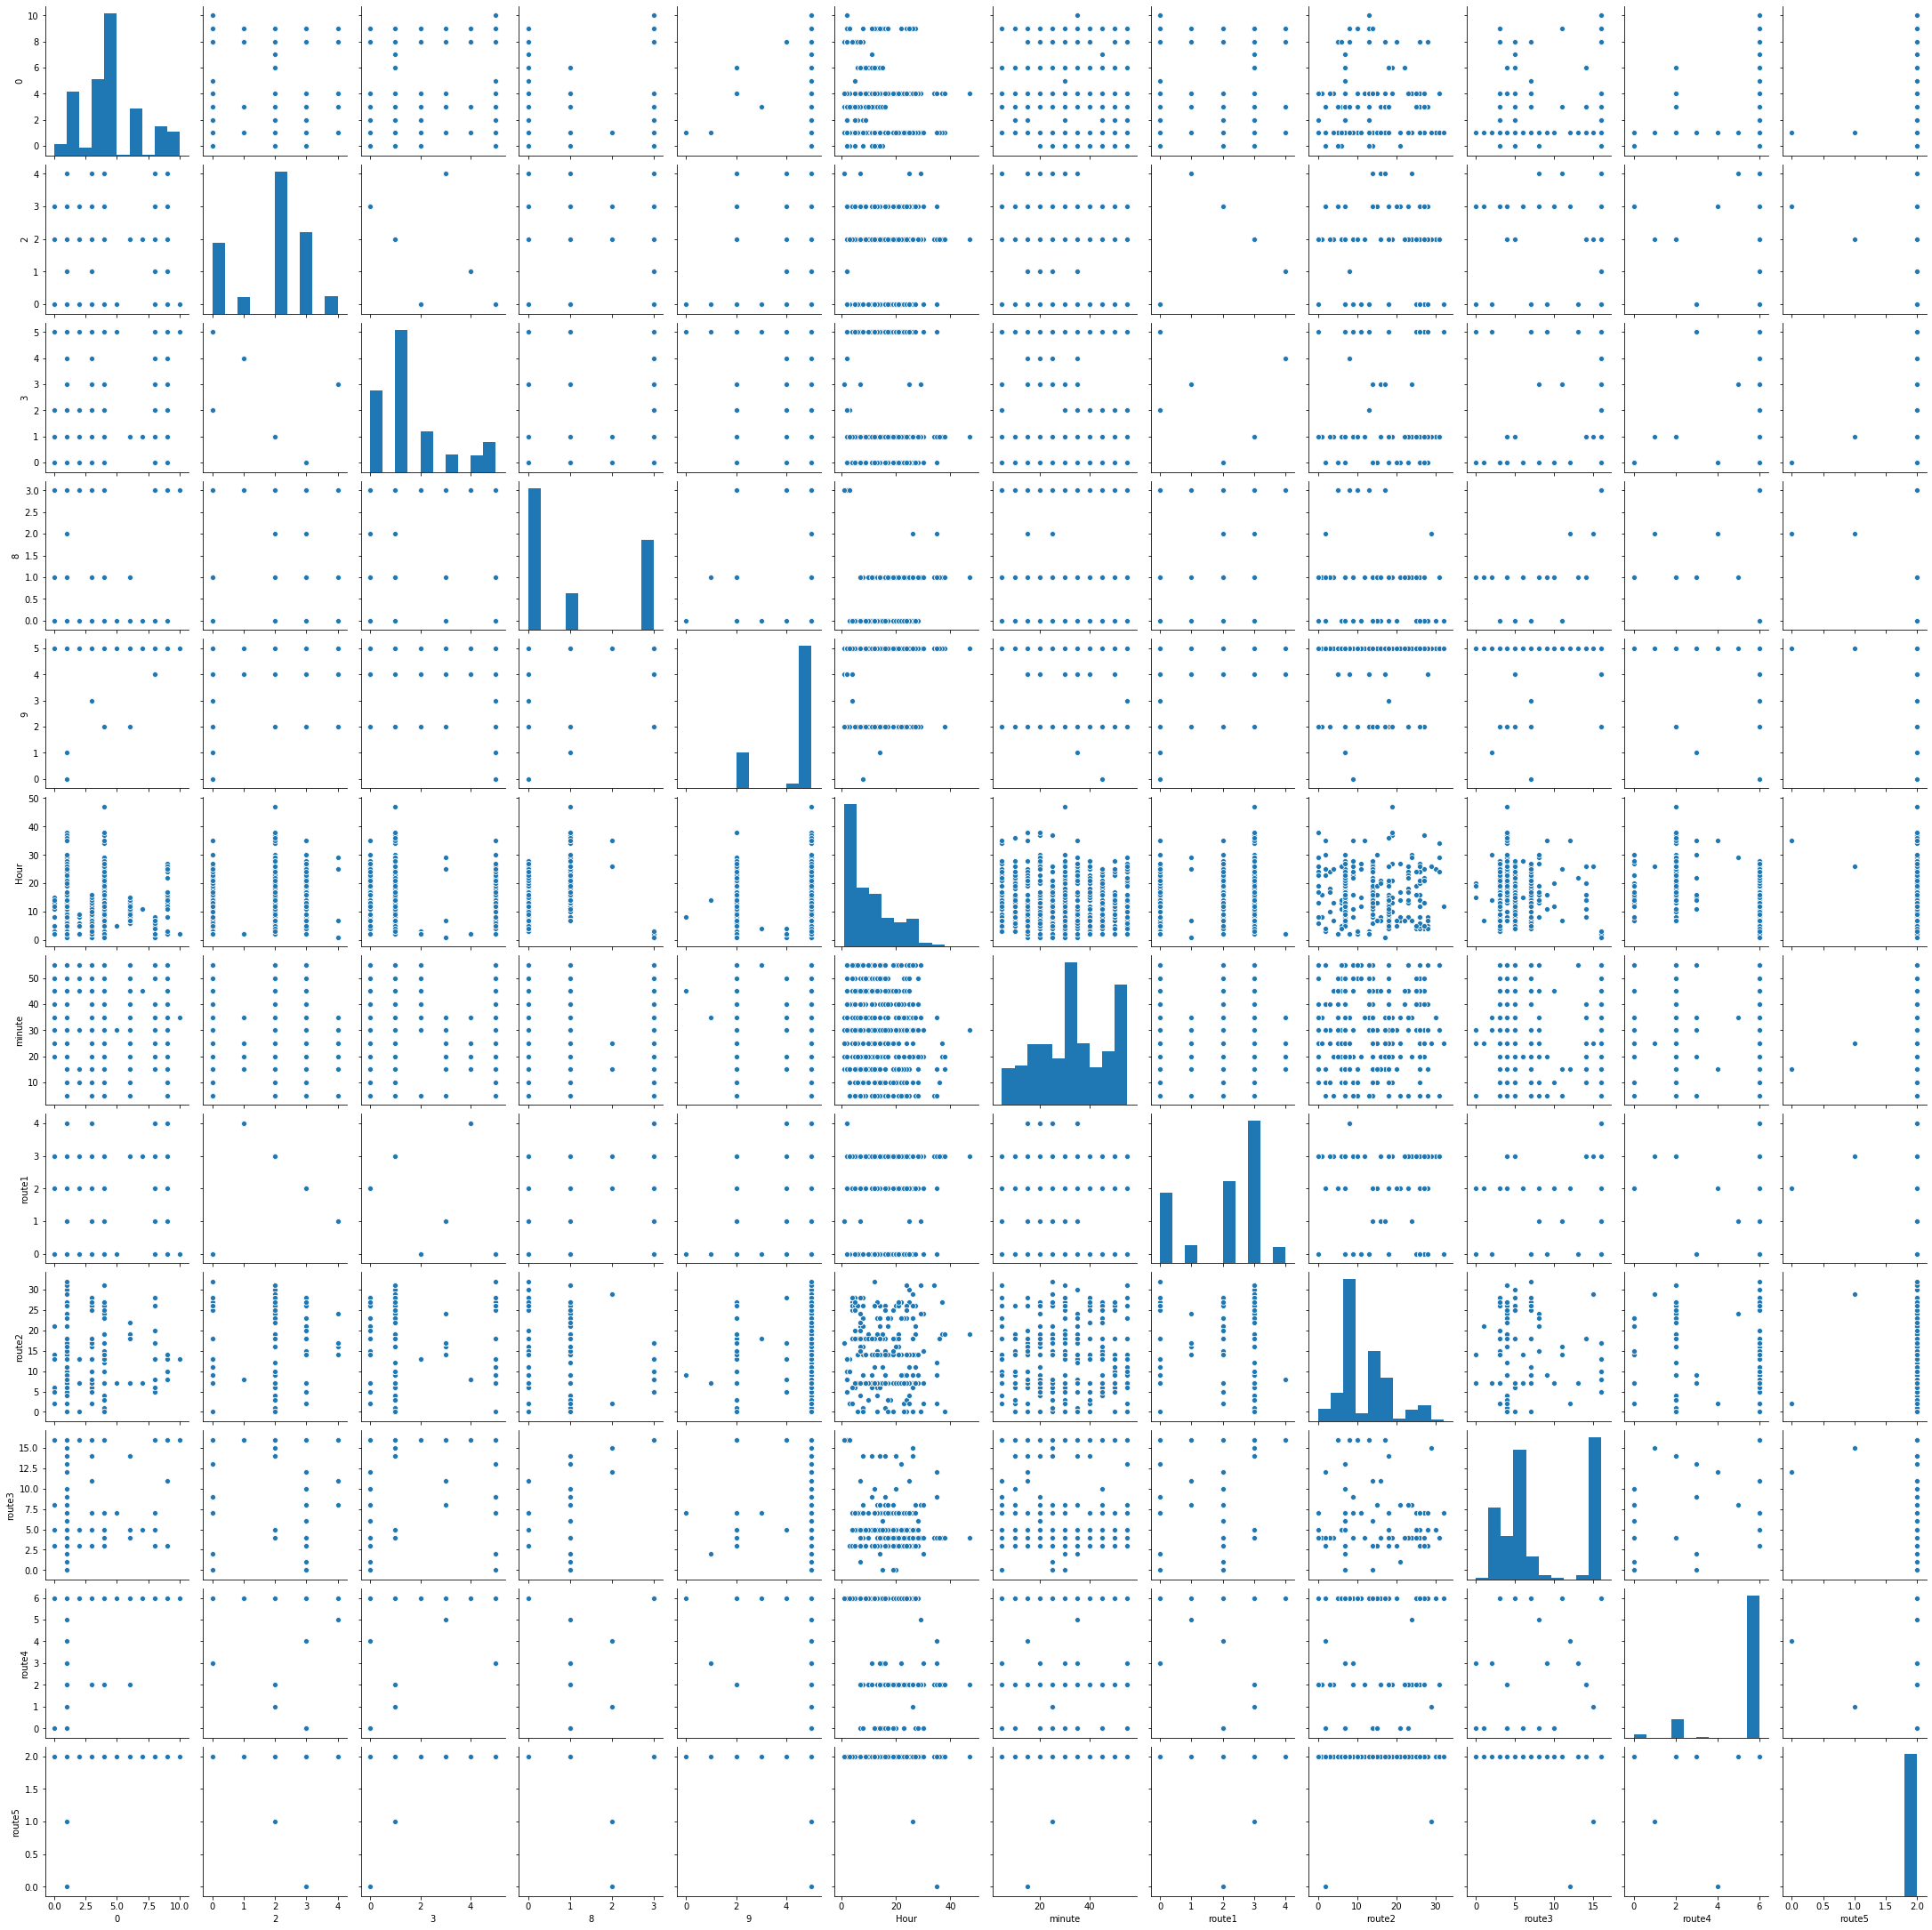

In [67]:
sns.pairplot(x)

In [73]:
##removing outliers

In [74]:
from scipy.stats import zscore

In [75]:
z=np.abs(zscore(x))

In [76]:
threshold=3
print(np.where(z>3))

(array([   1,   31,  125,  155,  226,  264,  291,  348,  378,  399,  402,
        432,  470,  525,  530,  553,  656,  665,  673,  720,  790,  848,
        856,  881,  893,  919,  958,  966,  969, 1014, 1020, 1043, 1045,
       1067, 1099, 1113, 1127, 1197], dtype=int64), array([10, 10, 10, 10,  5, 10,  8, 10, 10, 10, 11, 10,  8, 10, 10,  5, 10,
       10,  8,  8, 10, 10, 10, 10, 10, 11, 10,  5,  5,  8, 10,  4, 10,  5,
       10,  5, 10, 10], dtype=int64))


In [79]:
x_new=df[(z<3).all(axis=1)]

In [80]:
x_new.shape   #shape of the x after removing outliers

(1161, 14)

In [81]:
x.shape

(1199, 12)

In [83]:
#now we will use scaling technique to standardize the dataset

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
std=StandardScaler()

In [86]:
x=std.fit_transform(x)
x=pd.DataFrame(data=x)

In [87]:
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.442122,-1.611766,2.330159,1.368953,0.521182,-0.950966,1.311468,-1.650837,0.276612,1.359091,0.392587,0.038775
1,-1.311144,0.962622,-0.998243,-0.103792,0.521182,-0.354934,-0.424895,-0.040297,1.534677,-1.352909,-3.636334,0.038775
2,-0.007610,0.104493,-0.332563,-0.103792,0.521182,1.075541,-0.077622,0.764973,2.163710,-0.810509,-2.293360,0.038775
3,-0.442122,0.962622,-0.998243,-0.840165,0.521182,-0.593347,-0.424895,-0.040297,2.478227,-0.991309,0.392587,0.038775
4,-0.442122,-1.611766,2.330159,-0.840165,0.521182,-0.712553,0.964196,-1.650837,2.478227,-0.268109,0.392587,0.038775


<Figure size 432x288 with 0 Axes>

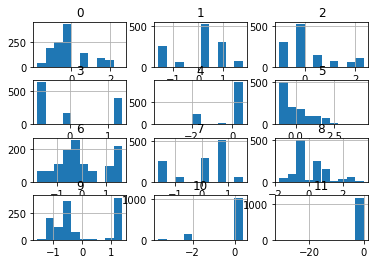

<Figure size 432x288 with 0 Axes>

In [90]:
x.hist()
plt.figure()

In [91]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1199 non-null   float64
 1   1       1199 non-null   float64
 2   2       1199 non-null   float64
 3   3       1199 non-null   float64
 4   4       1199 non-null   float64
 5   5       1199 non-null   float64
 6   6       1199 non-null   float64
 7   7       1199 non-null   float64
 8   8       1199 non-null   float64
 9   9       1199 non-null   float64
 10  10      1199 non-null   float64
 11  11      1199 non-null   float64
dtypes: float64(12)
memory usage: 112.5 KB


In [92]:
#now with the help of linear regression we will build our model and check the accuracy

In [93]:
#importing all required libraries

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [95]:
max_r2_scr=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.30)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,pred)
    print("the r2 score corrosponding to the random state",r_state,"is:",r2_scr)
    if r2_scr>max_r2_scr:
        max_r2_scr=r2_scr
        final_r_state=r_state

print()
print()
print("maximum r2 score for the random state",final_r_state,"is:",max_r2_scr)

the r2 score corrosponding to the random state 42 is: 0.4149612252600907
the r2 score corrosponding to the random state 43 is: 0.5600855643816713
the r2 score corrosponding to the random state 44 is: 0.4199097247267066
the r2 score corrosponding to the random state 45 is: 0.5712879969802953
the r2 score corrosponding to the random state 46 is: 0.4548428120081629
the r2 score corrosponding to the random state 47 is: 0.5128864307492909
the r2 score corrosponding to the random state 48 is: 0.5107593414164406
the r2 score corrosponding to the random state 49 is: 0.4759868972214476
the r2 score corrosponding to the random state 50 is: 0.49308288772538733
the r2 score corrosponding to the random state 51 is: 0.4677296202623018
the r2 score corrosponding to the random state 52 is: 0.4791655243845828
the r2 score corrosponding to the random state 53 is: 0.45129215090994246
the r2 score corrosponding to the random state 54 is: 0.4735799176908623
the r2 score corrosponding to the random state 55

In [96]:
#so linear regression is giving a maximum of 57% accuracy score

In [97]:
lr.coef_

array([[  348.54675411,  -115.55882922,   940.64276217, -1267.13682405,
          547.35223257,   414.04941411,  -117.73771451,  -664.56721422,
        -1011.84499356, -1710.35852486, -1324.42147402,   -69.15799081]])

In [98]:
lr.intercept_

array([8993.70470881])

In [99]:
from sklearn.linear_model import Lasso,Ridge

In [100]:
ls=Lasso()
rg=Ridge()

In [101]:
#using grid search cv to find the best alpha value

In [102]:
from sklearn.model_selection import GridSearchCV

In [103]:
param={'alpha':[0.001,0.01,0.1,1]}

In [104]:
gd=GridSearchCV(ls,param_grid=param)

In [105]:
gd.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [106]:
gd.best_estimator_

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [108]:
gd.best_params_    #aplha=1 is the best alpha score for lasso model 

{'alpha': 1}

In [109]:
gd.best_score_

0.44846773611097507

In [111]:
gd1=GridSearchCV(rg,param_grid=param)

In [112]:
gd1.fit(x,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [113]:
gd1.best_estimator_

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [114]:
gd1.best_params_    #best alpha value for ridge model

{'alpha': 1}

In [115]:
gd.best_score_   

0.44846773611097507

In [116]:
#using cross valid score to check the best result

In [117]:
from sklearn.model_selection import cross_val_score

In [118]:
score=cross_val_score(lr,x,y,cv=5)

In [119]:
score

array([0.53943961, 0.40362095, 0.41252238, 0.53129391, 0.53877792])

In [120]:
score1=cross_val_score(rg,x,y,cv=5)

In [121]:
score1

array([0.53988155, 0.40384698, 0.41238799, 0.53120142, 0.53879485])

In [122]:
#so we can see from the above that we are getting a maximum of 54% accuracy score using cross validation score


In [123]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [124]:
model=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor()]

In [125]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=45,test_size=0.20)
for i in model:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print(i,"score",r2_score(y_test,pred))
    print(i,"abs error",mean_absolute_error(y_test,pred))
    print(i,"sq error",mean_squared_error(y_test,pred))

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') score 0.7035447844317722
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') abs error 1501.1708333333333
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') sq error 5128750.887166667
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) score 0.021942084398064443
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) abs error 3480.631710222979
SVR(C=1.0, cac

In [126]:
# from above we can see that knn is giving the max r2 score, hence will use grid search cv to find the best parameter

In [127]:
#finding the best parameter for svr using gridsearch cv 

In [128]:
attr={'kernel':('rbf','linear','poly'),'C':[0,1,10]}

In [129]:
gd3=GridSearchCV(estimator=SVR(),param_grid=attr)

In [130]:
gd3.fit(x,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0, 1, 10], 'kernel': ('rbf', 'linear', 'poly')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [131]:
gd3.best_estimator_

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [132]:
gd3.best_params_

{'C': 10, 'kernel': 'linear'}

In [133]:
gd3.best_score_

0.4273219195733793

In [134]:
for i in range(1,21):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train,y_train)
    predknn=knn.predict(x_test)
    print("accuracy score at n_neighbor",i,"is:",r2_score(y_test,predknn))

accuracy score at n_neighbor 1 is: 0.6535052309256171
accuracy score at n_neighbor 2 is: 0.7570823786014689
accuracy score at n_neighbor 3 is: 0.7571118772765077
accuracy score at n_neighbor 4 is: 0.7107549995345793
accuracy score at n_neighbor 5 is: 0.7035447844317722
accuracy score at n_neighbor 6 is: 0.693112354970906
accuracy score at n_neighbor 7 is: 0.7083812839969519
accuracy score at n_neighbor 8 is: 0.7060060959591214
accuracy score at n_neighbor 9 is: 0.6995858483598814
accuracy score at n_neighbor 10 is: 0.7041422181425593
accuracy score at n_neighbor 11 is: 0.6889588208167774
accuracy score at n_neighbor 12 is: 0.6804830005414786
accuracy score at n_neighbor 13 is: 0.6802763765689764
accuracy score at n_neighbor 14 is: 0.685328403935224
accuracy score at n_neighbor 15 is: 0.6893753685243109
accuracy score at n_neighbor 16 is: 0.689911945485011
accuracy score at n_neighbor 17 is: 0.6876963254962316
accuracy score at n_neighbor 18 is: 0.6874019863290333
accuracy score at n_ne

In [135]:
#so we can see from the above that we are getting max r2 score at n neighbor=2

In [136]:
# now we will try to boost the result using ensembling technique

In [137]:
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,GradientBoostingRegressor

In [138]:
model=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor()]

In [139]:
for i in model:
    a=AdaBoostRegressor(base_estimator=i,n_estimators=150,learning_rate=0.01)
    a.fit(x_train,y_train)
    predad=a.predict(x_test)
    print("r2 score for model",i,"is:",r2_score(y_test,predad))

r2 score for model KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') is: 0.7418916360829033
r2 score for model SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) is: 0.019476422177214014
r2 score for model DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') is: 0.6714039737300377


In [140]:
l=[0.1,0.01,1.0]
for i in l:
    gd=GradientBoostingRegressor(learning_rate=i)
    gd.fit(x_train,y_train)
    predgd=gd.predict(x_test)
    print("r2 score at lerning rate",i,"is:",r2_score(y_test,predgd))

r2 score at lerning rate 0.1 is: 0.7331254275377734
r2 score at lerning rate 0.01 is: 0.5368430429283573
r2 score at lerning rate 1.0 is: 0.6787733691865857


In [141]:
a=[150,200,250,300,350]
for i in a:
    rd=RandomForestRegressor(n_estimators=i)
    rd.fit(x_train,y_train)
    predrd=rd.predict(x_test)
    print('r2 score at',i,'is:',r2_score(y_test,predrd))

r2 score at 150 is: 0.6714203607121387
r2 score at 200 is: 0.6529544359147488
r2 score at 250 is: 0.6816864331603061
r2 score at 300 is: 0.6713562232178757
r2 score at 350 is: 0.6697881045414268


In [152]:
a=pd.DataFrame({'model':('lin reg','knn','SVR','DTR','AdaboostRegressor','RandomForest','Gradientboost'),'scores':(57,76,43,11,67,73,68)})

In [153]:
a

,model,scores
0,lin reg,57
1,knn,76
2,SVR,43
3,DTR,11
4,AdaboostRegressor,67
5,RandomForest,73
6,Gradientboost,68


In [154]:
#so finalizing the model for the prediction

In [155]:
knn=KNeighborsRegressor(n_neighbors=2)

In [156]:
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [160]:
predkn=knn.predict(x_test)
ds=pd.DataFrame(data=predkn)
ds.to_csv('flight_prediction.csv')   #saving the predicted result in csv format

In [166]:
print("r2 score is:",r2_score(y_test,predkn)*100,"%")

r2 score is: 75.70823786014688 %


In [161]:
print(mean_absolute_error(y_test,predkn))

1359.8520833333334


In [163]:
from math import sqrt
print(sqrt(mean_squared_error(y_test,predkn)))  #root mean square error

2050.0089865148557


In [164]:
#dumping this model using serialization

In [167]:
from sklearn.externals import joblib

In [168]:
joblib.dump(knn,'flight_pred_knn.obj')

['flight_pred_knn.obj']